<div align="center"><h3>HW4, Question 3</h3></div>
<div align="center"><h5>Mohammadreza Ghofrani, 400131076</h5></div>

In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Configuration Parameter

In [2]:
SAVE_FIGURE = False

# Initializing

In [3]:
olivetti_faces_dataset = fetch_olivetti_faces()

In [4]:
test_dataset = list()
validation_dataset = list()
train_dataset = list()
for i, instance in enumerate(olivetti_faces_dataset['data']):
    strata_id = i % 10
    if strata_id > 8: # Test set
        test_dataset.append(instance)
    elif strata_id > 7: # Validation set
        validation_dataset.append(instance)
    else: # Training set
        train_dataset.append(instance)

test_dataset = np.array(test_dataset)
validation_dataset = np.array(validation_dataset)
train_dataset = np.array(train_dataset)

# Part B

In [5]:
def kmeans(x_train, k):
    number_of_data = x_train.shape[0]
    number_of_features = x_train.shape[1]
    a = np.random.choice(range(number_of_data), k, replace=False)
    centers = x_train[a,:]
    current_centers = centers
    distance_between_new_and_previous_centers = float("inf")
    while distance_between_new_and_previous_centers > 0.001:
        previous_centers = current_centers
        distances = np.zeros((k, number_of_data))
        for i, center in enumerate(centers):
            distances[i, :] = \
                np.sqrt(np.sum((x_train - center)**2, axis=1))
        y_predicted = np.argmin(distances, axis=0)
        centers = np.zeros((k, number_of_features))
        for i in range(k):
            centers[i, :] = np.mean(x_train[y_predicted==i,:], axis=0)
        current_centers = centers
        distance_between_new_and_previous_centers = \
            np.sqrt(np.sum((current_centers - previous_centers)**2))
    return centers, y_predicted

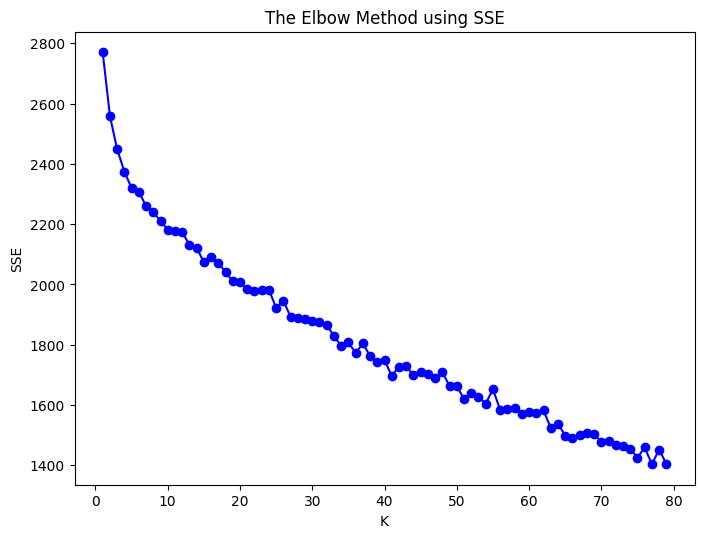

In [6]:
k_range = list(range(1, 80))
sse_k = list()
for k in k_range:
    centers, y_predicted = kmeans(train_dataset, k)
    sse = 0
    for y in set(y_predicted):
        sse += np.sum(
            np.sqrt(np.sum((train_dataset[y_predicted==y, :] - centers[y, :])**2, axis=1))
            )
    sse_k.append(sse)

figure(figsize=(8, 6), dpi=100)
plt.plot(k_range, sse_k, 'bo-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('The Elbow Method using SSE')
if SAVE_FIGURE:
    plt.savefig(f'../images/q3/b/elbow.png')
plt.show()

# Part C

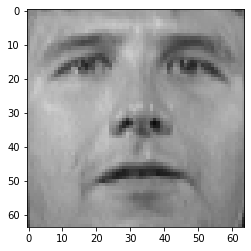

In [7]:
k = 40
centers, y_predicted = kmeans(train_dataset, k)
for cluster in set(y_predicted):
    n_cluster = np.count_nonzero(y_predicted==cluster)
    samples_of_cluster = \
        train_dataset[y_predicted==cluster, :][np.random.choice(range(n_cluster), min(10,n_cluster), replace=False), :]
    for i, sample in enumerate(samples_of_cluster):
        plt.imshow(sample.reshape(64,64), cmap='gray', vmin=0, vmax=1)
        if SAVE_FIGURE:
            plt.savefig(f'../images/q3/c/{cluster}/{i}.png')